# Detecting changes in slope with an $\ell_0$ penalty

Detection de points de rupture avec une pénalité l0, tiré de l'article de Maidstone et al [2017](https://arxiv.org/pdf/1701.01672)

In [ ]:
from src.cpop import CPOP
import numpy as np
from src.utils import generate_processus
import matplotlib.pyplot as plt
from src.cost import LogCost
from scipy.stats import median_abs_deviation

In the first part, we focus solely on data generated according to the model described in the article (piecewise linear with continuity).

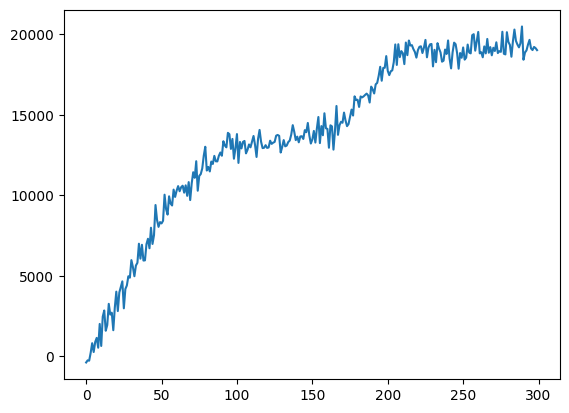

In [296]:
plt.plot(generate_processus(scale=200, mean=0, sigma=500))

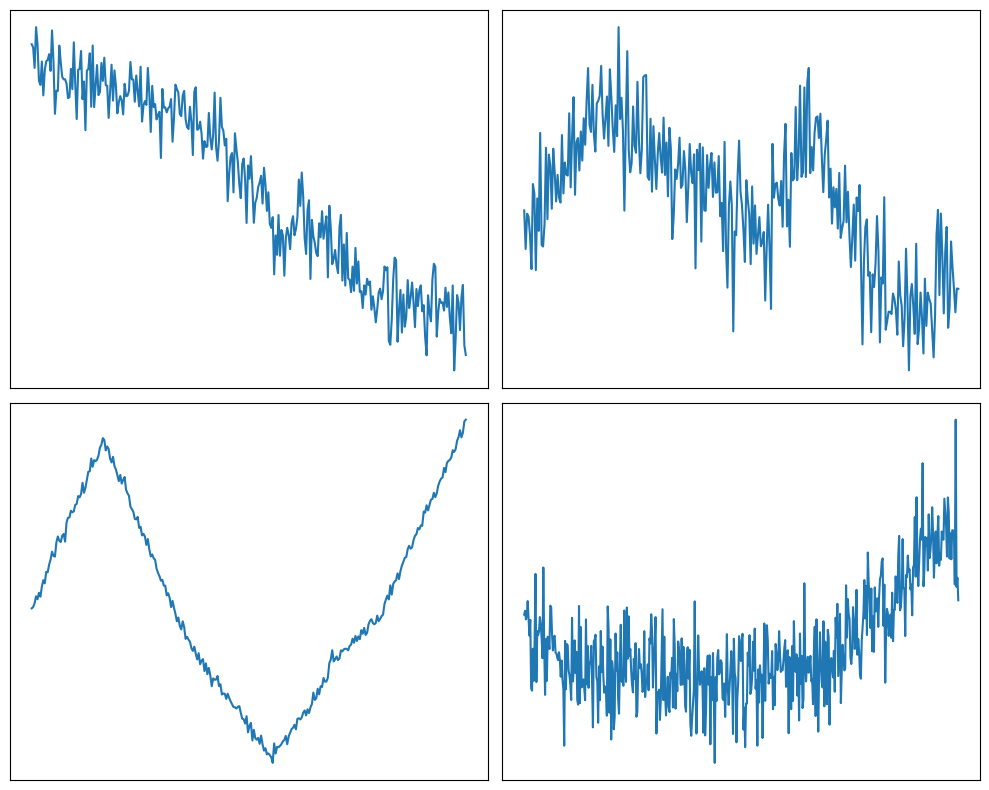

In [210]:
true_sigma = 10


fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 layout
y = generate_process(T=300, k=5, sigma=true_sigma, scale=2)
axes[0, 0].plot(y)
axes[0, 0].set_title("")
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])


true_sigma = 5
y = generate_process(T=300, k=5, sigma=true_sigma, scale=1)
axes[0, 1].plot(y)
axes[0, 1].set_title("")
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

true_sigma = 2
y = generate_process(T=300, k=8, sigma=true_sigma, scale=4)
axes[1, 0].plot(y)
axes[1, 0].set_title("")
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

true_sigma = 20
y = generate_process(T=500, k=10, sigma=true_sigma, scale=2)
axes[1, 1].plot(y)
axes[1, 1].set_title("")
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

# Ajustement des espaces entre les sous-figures
plt.tight_layout()

# Affichage de la figure
plt.show()

First estimation with random parameters

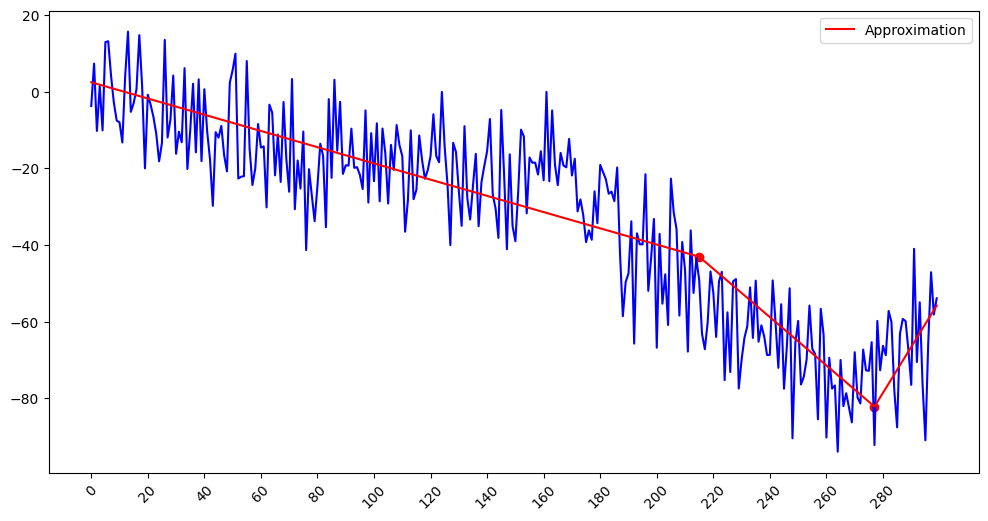

In [214]:
true_sigma = 10
sigma = 20
y = generate_process(T=300, k=5, sigma=true_sigma, scale=2)
detector = CPOP(y, beta=1 * np.log(len(y)), sigma=sigma)
detector.run()
detector.compute_approx_and_plot(stride=20)

### Now let's see the impact of $\hat{\sigma}$ on a simple example

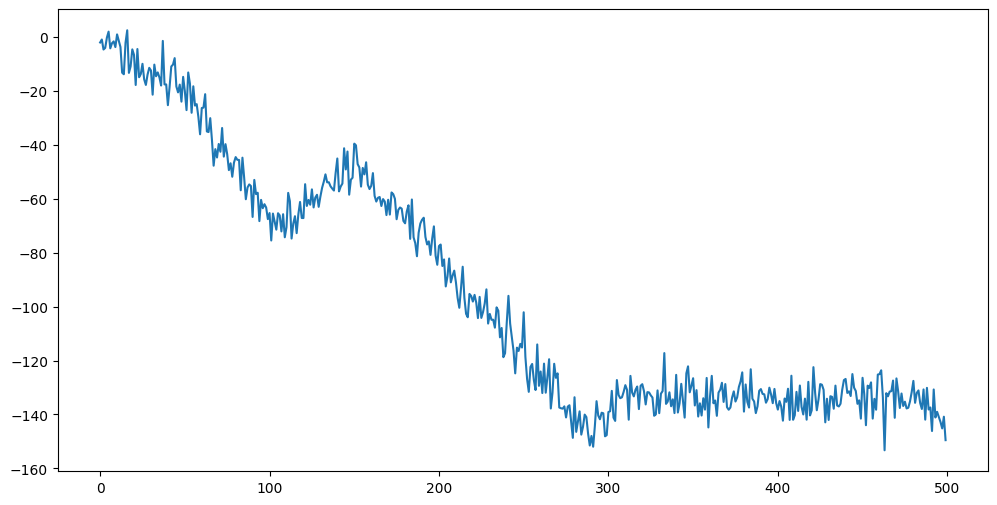

In [302]:
true_sigma = 5
y = generate_process(T=500, k=8, sigma=true_sigma, scale=2)
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1024023/2949911427.py:21: SyntaxWarning: invalid escape sequence '\s'
  f"$\sigma$={sigmas[dict_[i][0]]}\nbeta={betas[dict_[i][1]]:.2f}",


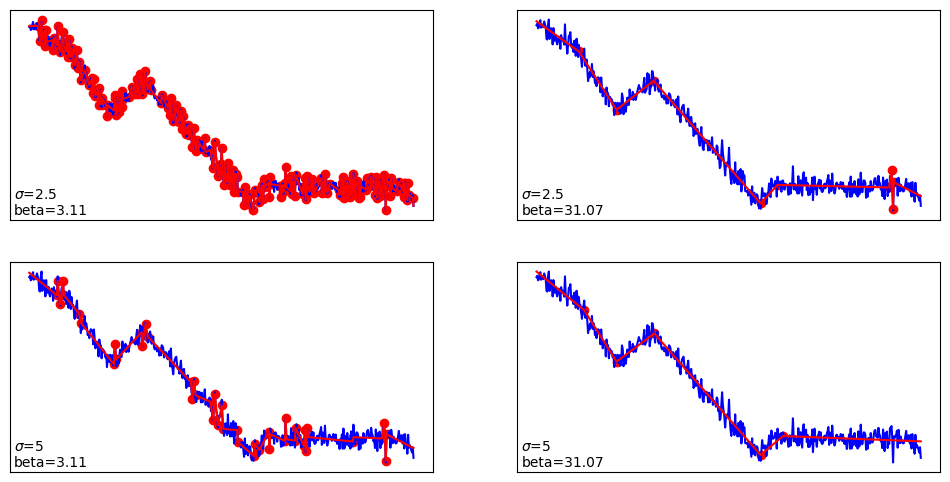

In [316]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

sigmas = [true_sigma / 2, true_sigma, 0, 0]
betas = [0.5 * np.log(len(y)), 5 * np.log(len(y))]
h = LogCost(1)
dict_ = {0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1)}

for i, sigma in enumerate(sigmas):
    detector = CPOP(y, sigma=sigmas[dict_[i][0]], h=h, beta=betas[dict_[i][1]])
    detector.run()

    detector.compute_approx_and_plot(stride=20, verbose=False)
    axs[dict_[i][0], dict_[i][1]].plot(detector.y, color="blue")
    axs[dict_[i][0], dict_[i][1]].plot(detector.approx, c="r")
    axs[dict_[i][0], dict_[i][1]].scatter(
        np.arange(0, len(detector.y))[detector.ckpts[1:-1]],
        detector.approx[detector.ckpts[1:-1]],
        c="r",
    )
    axs[dict_[i][0], dict_[i][1]].set_xticks([])
    axs[dict_[i][0], dict_[i][1]].set_yticks([])
    axs[dict_[i][0], dict_[i][1]].text(
        0.01,
        0.01,  # Coordonnées relatives au bas à gauche
        f"$\sigma$={sigmas[dict_[i][0]]}\nbeta={betas[dict_[i][1]]:.2f}",
        fontsize=10,
        color="black",
        transform=axs[
            dict_[i][0], dict_[i][1]
        ].transAxes,  # Coordonnées relatives à l'axe
        ha="left",  # Alignement horizontal
        va="bottom",  # Alignement vertical
    )

In [27]:
true_sigma = 50
y = generate_process(T=1000, k=5, sigma=true_sigma, scale=2.4)

We can clearly see that the estimation of $\sigma$ play an important role for the model

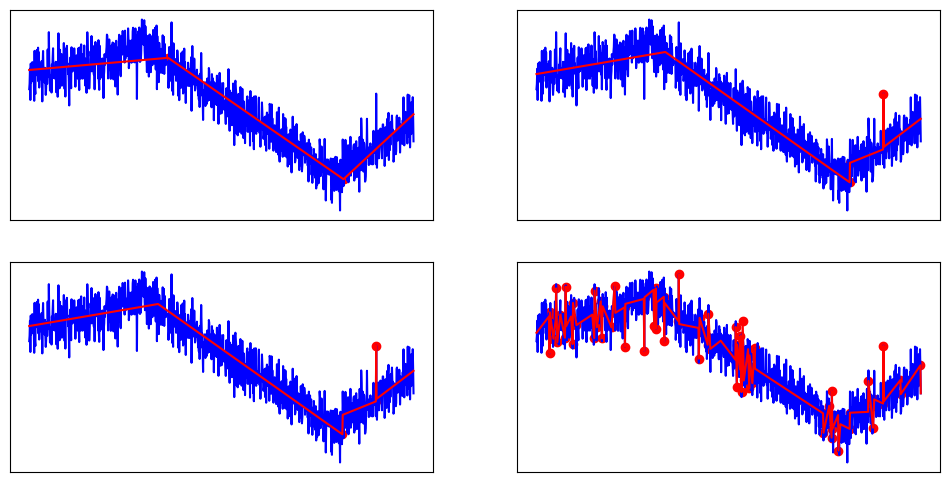

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

sigmas = [
    np.std(np.diff(y)),
    median_abs_deviation(np.diff(y)),
    true_sigma,
    true_sigma * 0.65,
]
h = LogCost(1)
dict_ = {0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1)}

for i, sigma in enumerate(sigmas):
    detector = CPOP(y, sigma=sigma, h=h, beta=1 * np.log(len(y)))
    detector.run()

    detector.compute_approx_and_plot(stride=20, verbose=False)
    axs[dict_[i][0], dict_[i][1]].plot(detector.y, color="blue")
    axs[dict_[i][0], dict_[i][1]].plot(detector.approx, c="r")
    axs[dict_[i][0], dict_[i][1]].scatter(
        np.arange(0, len(detector.y))[detector.ckpts[1:-1]],
        detector.approx[detector.ckpts[1:-1]],
        c="r",
    )
    axs[dict_[i][0], dict_[i][1]].set_xticks([])
    axs[dict_[i][0], dict_[i][1]].set_yticks([])

The results highly depends on $\beta$ too. For instance, let's use a higher value for $\beta$

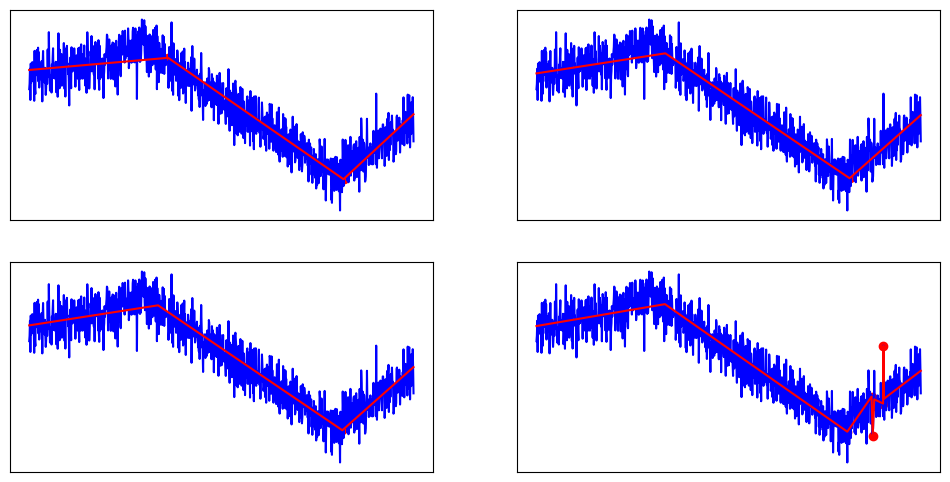

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

sigmas = [
    np.std(np.diff(y)),
    median_abs_deviation(np.diff(y)),
    true_sigma,
    true_sigma * 0.65,
]
h = LogCost(1)
dict_ = {0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1)}

for i, sigma in enumerate(sigmas):
    detector = CPOP(y, sigma=sigma, h=h, beta=2 * np.log(len(y)))
    detector.run()

    detector.compute_approx_and_plot(stride=20, verbose=False)
    axs[dict_[i][0], dict_[i][1]].plot(detector.y, color="blue")
    axs[dict_[i][0], dict_[i][1]].plot(detector.approx, c="r")
    axs[dict_[i][0], dict_[i][1]].scatter(
        np.arange(0, len(detector.y))[detector.ckpts[1:-1]],
        detector.approx[detector.ckpts[1:-1]],
        c="r",
    )
    axs[dict_[i][0], dict_[i][1]].set_xticks([])
    axs[dict_[i][0], dict_[i][1]].set_yticks([])

$\sigma$ and $\beta$ has an impact on each other and it may be hard to select one while the other one is fixed.

## Statistical criterion to select $\beta$

We aim to use a criterion to choose $\beta$ (and $\sigma$)

Since we have a statistical model, we can suppose that the residuals follows a gaussian law and deduce the likelihood of the model. Then we can use some classicals statistical criterion (AIC, BIC)

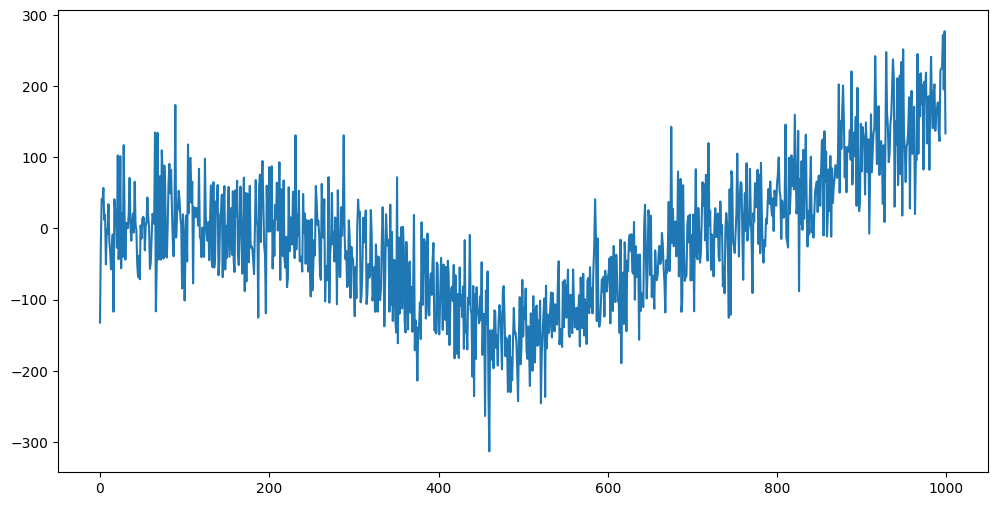

In [93]:
true_sigma = 50
y = generate_process(T=1000, k=5, sigma=true_sigma, scale=2)
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.show()

### BIC

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:17<00:00,  2.27it/s]


Beta for min BIC: 6.998646795810848
BIC: 10921.835861860834


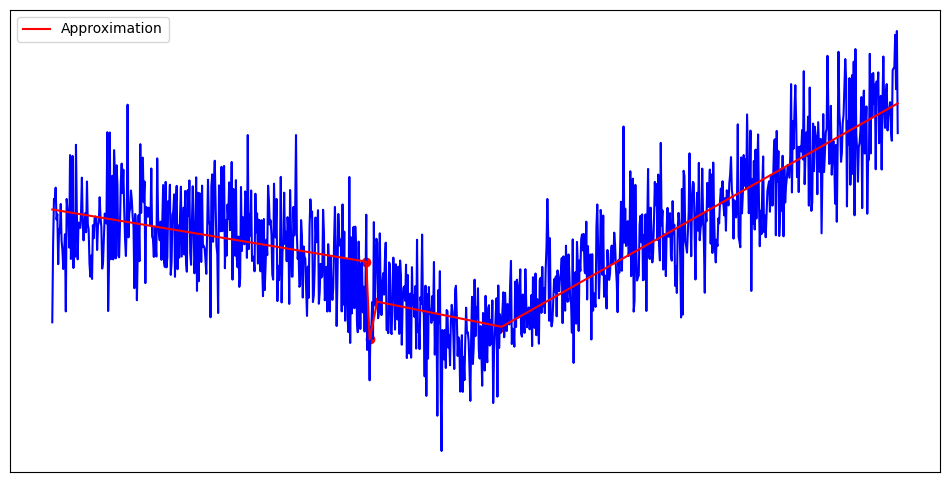

In [94]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    log_n=True,
    upd_sigma=True,
    reset_sigma=False,
    noticks=True,
)

### AIC

100%|██████████| 39/39 [00:17<00:00,  2.26it/s]


Beta for min AIC: 3.4538776394910684
AIC: 10996.221002750995


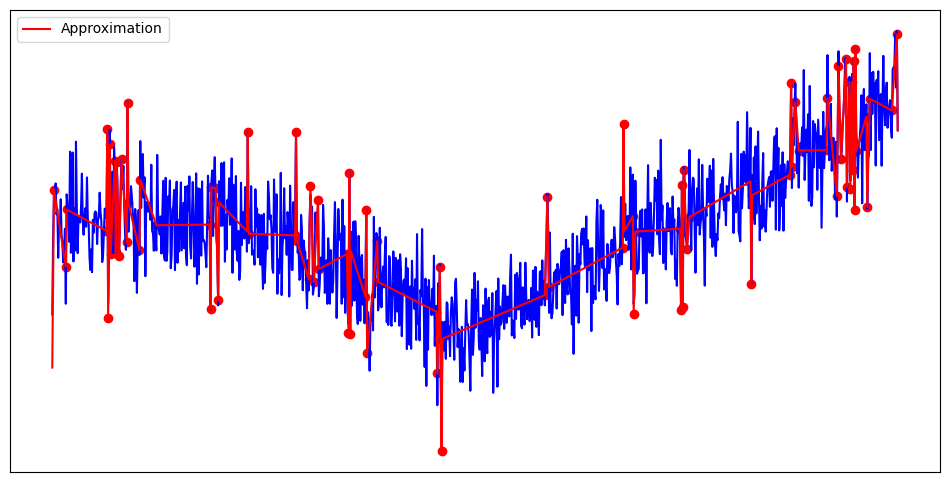

In [95]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    upd_sigma=True,
    log_n=True,
    reset_sigma=False,
    criterion="AIC",
    noticks=True,
)

### modified BIC

100%|██████████| 39/39 [00:17<00:00,  2.26it/s]


Beta for min mBIC: 14.088185108450412
mBIC: 10941.813344905697


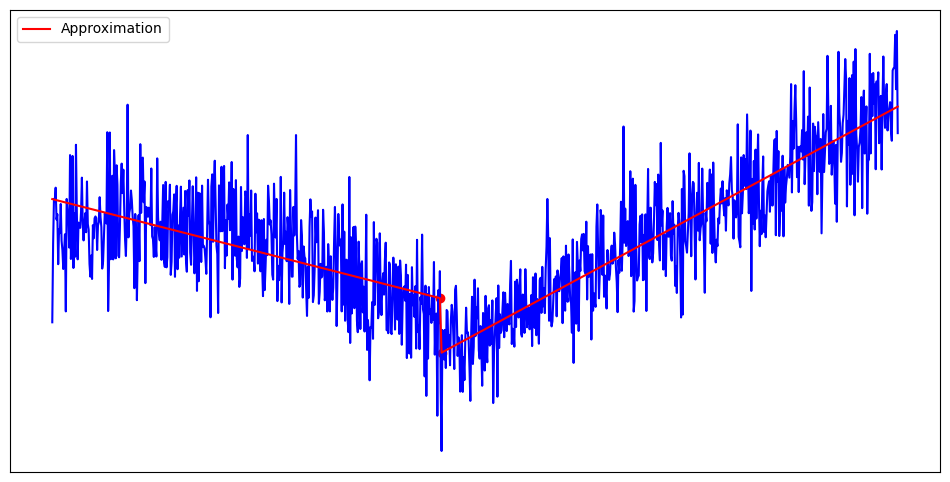

In [96]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    log_n=True,
    upd_sigma=True,
    reset_sigma=False,
    criterion="mBIC",
    noticks=True,
)

Here we start from a low value of $\beta$ to a large one. When $\beta$ is low, we likeli underestimate $\sigma$, whereas if $\beta$ is large, we will overestimate it. We can try to start from a large value of $\beta$ to a low one to see if it changes the results.

100%|██████████| 39/39 [00:16<00:00,  2.40it/s]


Beta for min mBIC: 6.998646795810848
mBIC: 11273.076700013838


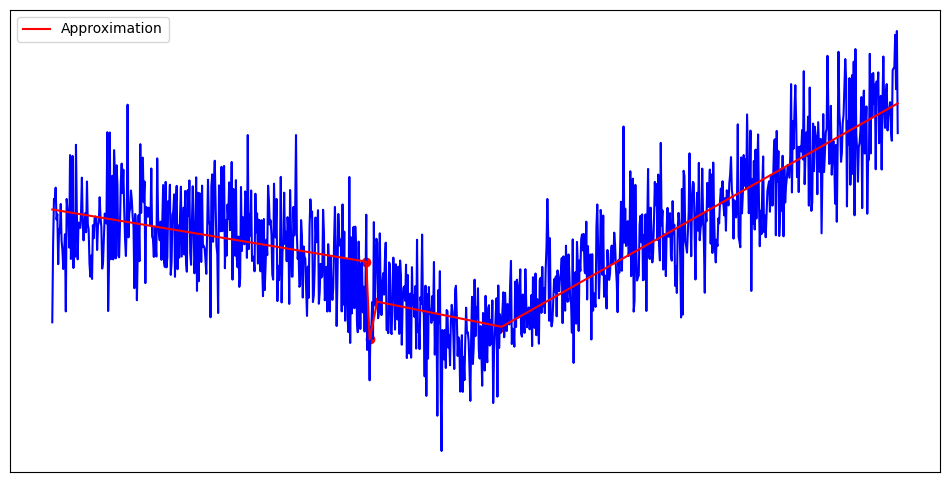

In [98]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39)[::-1],
    criterion="mBIC",
    log_n=True,
    upd_sigma=True,
    reset_sigma=False,
    noticks=True,
)

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:16<00:00,  2.38it/s]


Beta for min AIC: 3.4538776394910684
AIC: 10659.38019547251


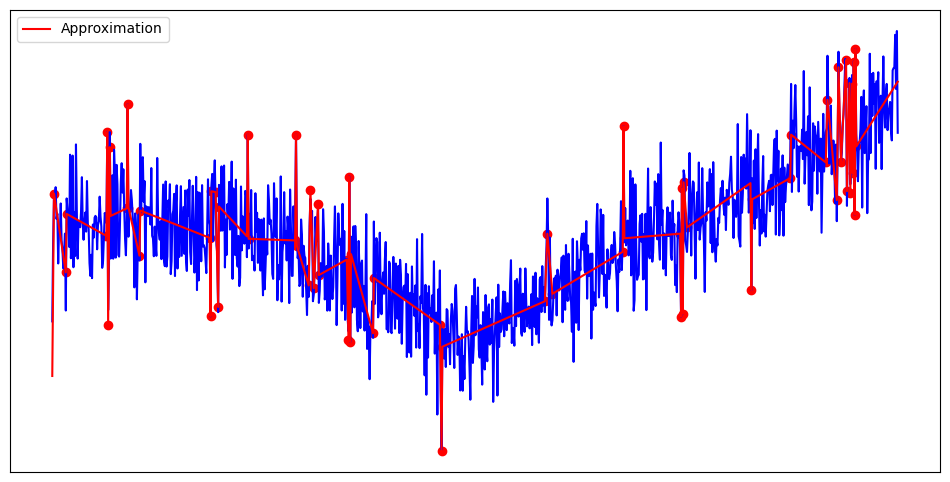

In [99]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39)[::-1],
    upd_sigma=True,
    log_n=True,
    reset_sigma=False,
    criterion="AIC",
    noticks=True,
)

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:16<00:00,  2.38it/s]


Beta for min mBIC: 6.998646795810848
mBIC: 11273.076700013838


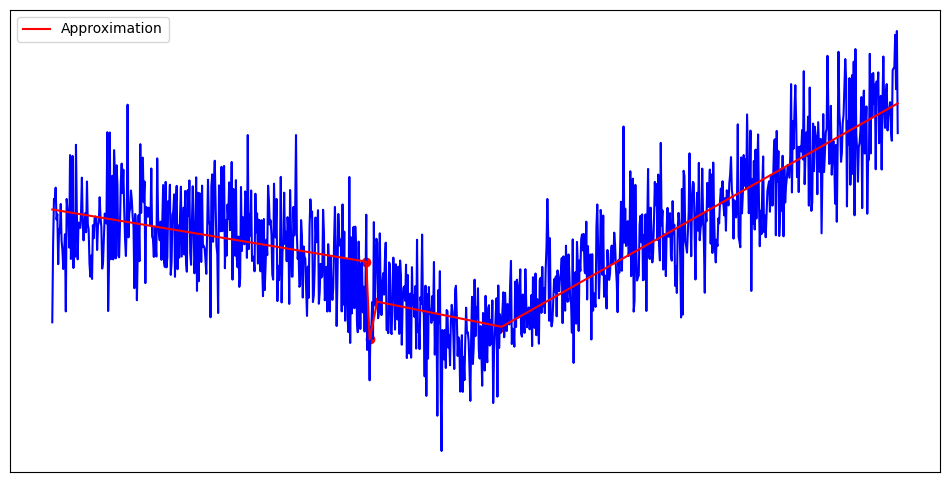

In [100]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39)[::-1],
    log_n=True,
    upd_sigma=True,
    reset_sigma=False,
    criterion="mBIC",
    noticks=True,
)

We tested it on several series and almost every time, it led to better results when starting from a low $\beta$ to a large $\beta$

### Noise Removal?

As we can see the results can be highly sensitive to a large noise or to outliers. We can not really use the the traditional outlier removal techniques. Maybe we would like to try some noise reduction

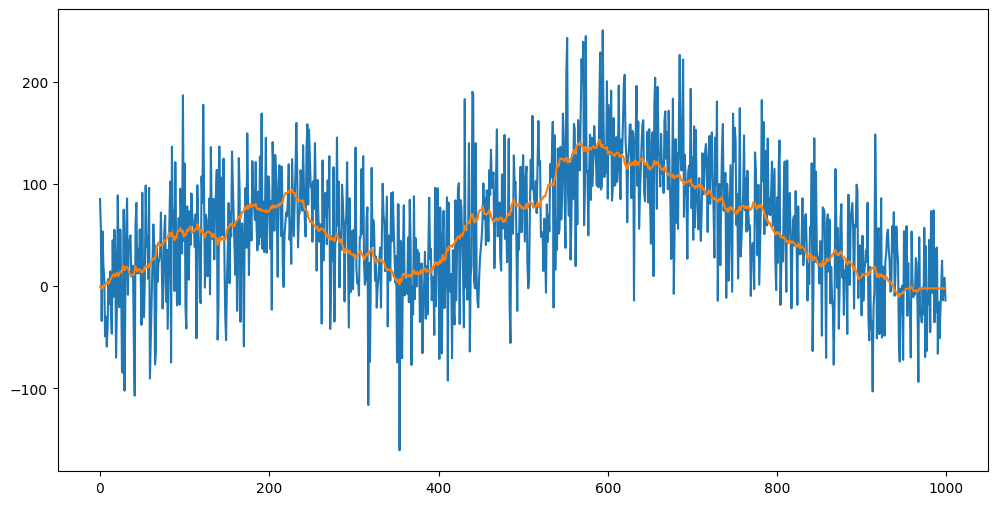

In [32]:
from src.utils import ssa_approx

true_sigma = 50
y = generate_process(T=1000, k=5, sigma=true_sigma, scale=2)

y_hat = ssa_approx(y, m=1)
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.plot(y_hat)
plt.show()

  0%|          | 0/39 [00:00<?, ?it/s]/home/onyxia/work/CPD_MVA/src/cpop.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (phis[i] - phis[i - 1]) / (ckpts[i] - ckpts[i - 1])
100%|██████████| 39/39 [00:42<00:00,  1.10s/it]


Beta for min BIC: 6.998646795810848
BIC: 6721.775370131302


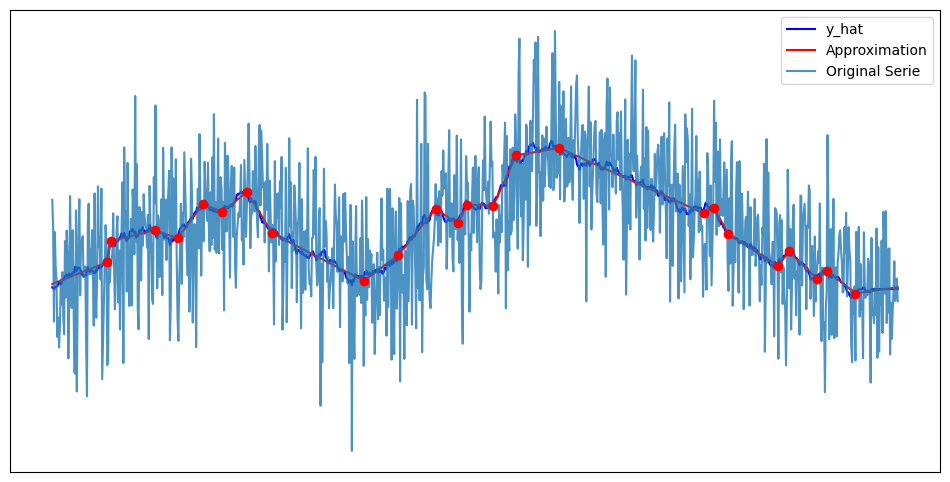

In [ ]:
sigma = median_abs_deviation(np.diff(y_hat))
h = LogCost(1)

detector = CPOP(y_hat, sigma, h=h)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 200, 39),
    log_n=True,
    upd_sigma=True,
    reset_sigma=False,
    criterion="mBIC",
    noticks=True,
)

Using SSA approximation does not really improve the results, the model will more overfit even if we higher the value of $\beta$

100%|██████████| 39/39 [00:07<00:00,  5.03it/s]


Beta for min mBIC: 8.90576375656924
mBIC: 3429.988127259499


100%|██████████| 39/39 [00:06<00:00,  5.76it/s]


Beta for min mBIC: 11.659727548920586
mBIC: 2208.122850874735


100%|██████████| 39/39 [00:07<00:00,  5.14it/s]


Beta for min mBIC: 11.993192274896167
mBIC: 3618.3002274655373


100%|██████████| 39/39 [00:10<00:00,  3.89it/s]


Beta for min mBIC: 21.676911205239293
mBIC: 4671.273398793027


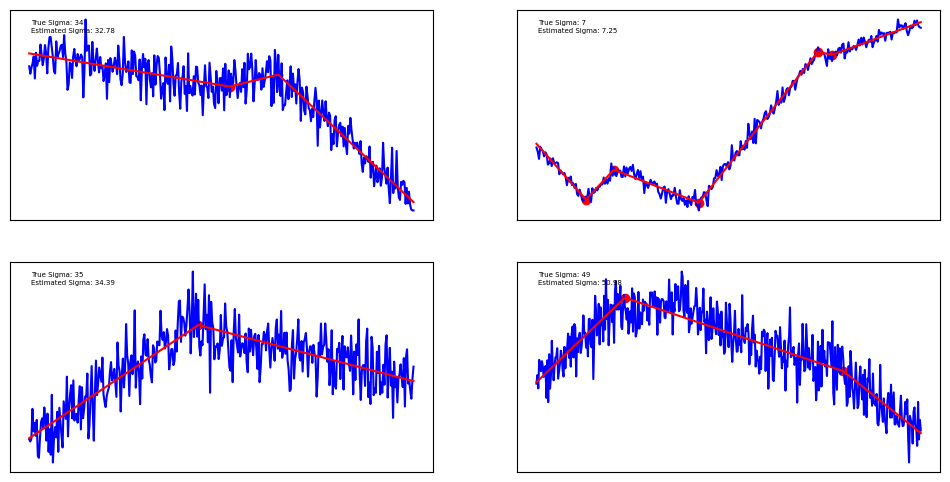

In [323]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

h = LogCost(0.2)
dict_ = {0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1)}

for i in range(4):
    true_sigma = np.random.randint(5, 50)
    T = np.random.randint(300, 500)
    y = generate_process(T=T, k=5, sigma=true_sigma, scale=5)
    sigma = median_abs_deviation(np.diff(y))
    detector = CPOP(y, sigma=sigma, h=h)
    detector.compute_max_criterion(
        beta_range=np.linspace(0.5, 20, 39),
        log_n=True,
        upd_sigma=True,
        reset_sigma=False,
        criterion="mBIC",
        noticks=True,
        verbose=False,
    )
    detector._reset_coefs()
    detector.run()
    detector.compute_approx_and_plot(verbose=False)
    detector.update_sigma()
    axs[dict_[i][0], dict_[i][1]].plot(detector.y, color="blue")
    axs[dict_[i][0], dict_[i][1]].plot(detector.approx, c="r")
    axs[dict_[i][0], dict_[i][1]].scatter(
        np.arange(0, len(detector.y))[detector.ckpts[1:-1]],
        detector.approx[detector.ckpts[1:-1]],
        c="r",
    )
    axs[dict_[i][0], dict_[i][1]].set_xticks([])
    axs[dict_[i][0], dict_[i][1]].set_yticks([])
    axs[dict_[i][0], dict_[i][1]].text(
        0.05,
        0.95,
        f"True Sigma: {true_sigma}\nEstimated Sigma: {detector.sigma:.2f}",
        transform=axs[
            dict_[i][0], dict_[i][1]
        ].transAxes,  # Coordonnées relatives à l'axe
        fontsize=5,
        color="black",
        ha="left",
        va="top",
    )

Sometimes, we have some changepoints really close to each other. Choosing an other value for function h should improve the results

## Some experiences on real world Dataset

The purpose of this section is to show some results on real world data when using the simple strategy we propose:

```start from sigma = MAD( DIFF(y) )
for beta in range ...
    detector.run()
    detector.update_sigma()

select detector.min("criterion")```
return tau, phi that minimise the criterion

### GDP Argentina

100%|██████████| 39/39 [00:01<00:00, 38.37it/s]


Beta for min AIC: 12.500871374079377
AIC: 4003.1018890880086
BIC:  2932.3878208937476


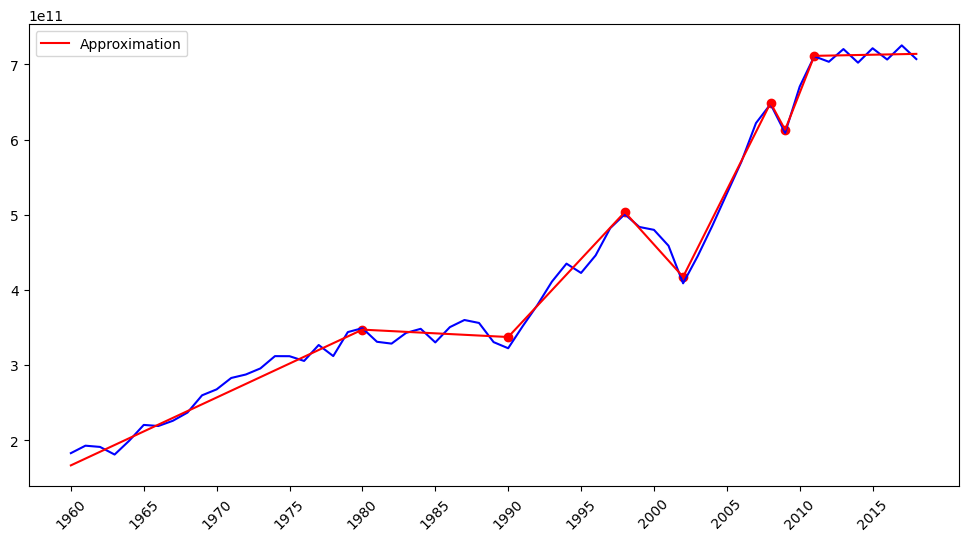

In [ ]:
import pandas as pd
import json


### Non interesting treatment for the data set
df = pd.read_csv("../data/gdp.csv", skiprows=4)

sdf = df[df["Country Name"] == "Argentina"]

columns_years = [col for col in sdf.columns if col.isdigit()]
ts = sdf.loc[:, columns_years]

serie = ts.reset_index(drop=True).T
###
y = serie[0].to_numpy()

h = LogCost(1)
sigma = median_abs_deviation(serie[0])


detector = CPOP(y, sigma, h=h, idxs=ts.columns)

detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    log_n=True,
    upd_sigma=True,
    verbose=True,
    reset_sigma=False,
    criterion="AIC",
    noticks=False,
)
print("BIC: ", float(detector.BIC()))

### GDP Iran

100%|██████████| 39/39 [00:01<00:00, 24.24it/s]


Beta for min mBIC: 60.906645158196284
mBIC: 4165.304012187976


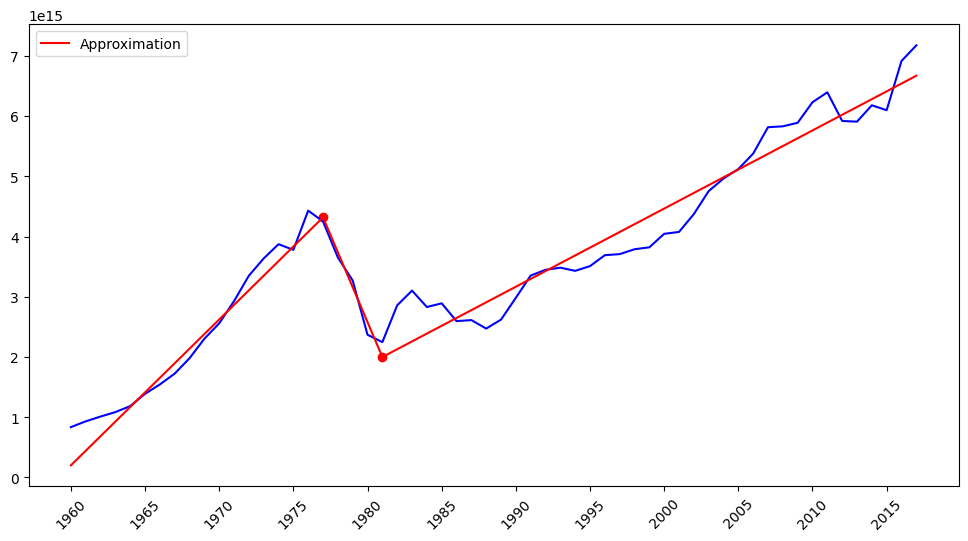

In [ ]:
### Loading the data...
with open("../data/gdp_iran.json", "r") as file:
    data = json.load(file)

gdp_iran = np.array(data["series"][0]["raw"])
idxs = np.array(data["time"]["raw"])
###
sigma = median_abs_deviation(np.diff(gdp_iran))


h = LogCost(1)

detector = CPOP(gdp_iran, sigma, h=h, idxs=idxs)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    log_n=True,
    upd_sigma=True,
    verbose=True,
    reset_sigma=False,
    criterion="mBIC",
    noticks=False,
)

1979 : Iranian's revolution
1980 : Iran-Irak war
2011 : Hard embargo

### Bitcoin

100%|██████████| 39/39 [00:09<00:00,  3.94it/s]


Beta for min mBIC: 117.99794707164983
mBIC: 8207.595663435257


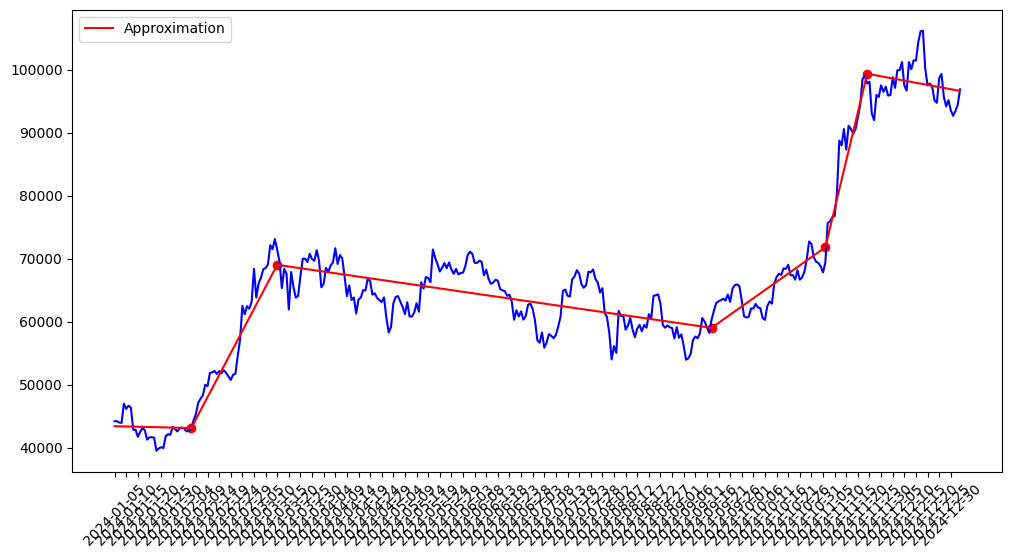

In [123]:
### Data loading ...
with open("../data/market-price.json", "r") as file:
    data = json.load(file)

market_price_data = data["market-price"]

df = pd.DataFrame(market_price_data)

df.rename(columns={"x": "timestamp", "y": "value"}, inplace=True)

df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

###

y = df["value"].to_numpy()


h = LogCost(1)
sigma = median_abs_deviation(np.diff(y))
beta = 5 * np.log(len(y))

detector = CPOP(y, sigma, beta, h, idxs=df["timestamp"].astype(str))
output = detector.run()
# Since here we have a longer time serie, we will use the mBIC
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    log_n=True,
    upd_sigma=True,
    verbose=True,
    reset_sigma=False,
    criterion="mBIC",
    noticks=False,
)

100%|██████████| 39/39 [00:10<00:00,  3.83it/s]


Beta for min BIC: 5.9775275819191025
BIC: 7234.241725726539


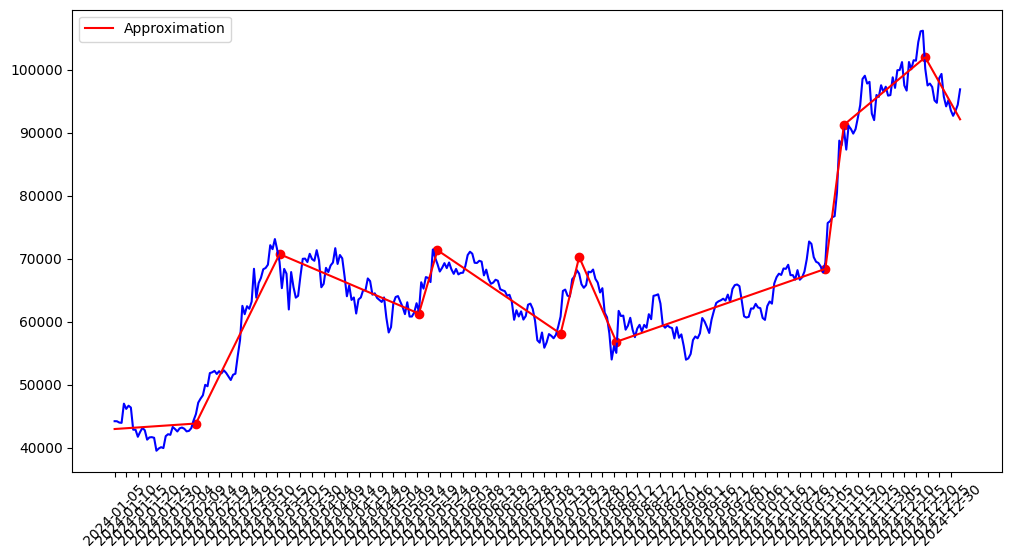

In [ ]:
y = df["value"].to_numpy()


h = LogCost(1)
sigma = median_abs_deviation(np.diff(y))
beta = 5 * np.log(len(y))

detector = CPOP(y, sigma, beta, h, idxs=df["timestamp"].astype(str))

# Since here we have a longer time serie, we will use the mBIC
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    log_n=True,
    upd_sigma=True,
    verbose=True,
    reset_sigma=False,
    criterion="BIC",
    noticks=False,
)

### Euro Stock 500

[*********************100%***********************]  1 of 1 completed
100%|██████████| 39/39 [05:57<00:00,  9.16s/it]


Beta for min mBIC: 25.75809585786637
mBIC: 55605.6029131439


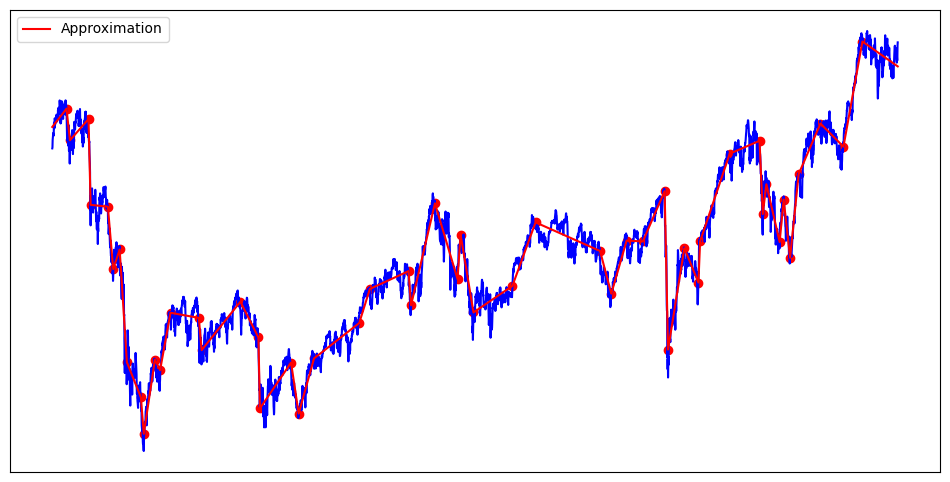

In [12]:
import yfinance as yf

euro_stoxx_50 = yf.download(
    "^STOXX50E",
    start="2005-01-01",
)["Close"]

y = euro_stoxx_50["^STOXX50E"].to_numpy()
beta = 2 * np.log(len(y))

h = LogCost(1)
sigma = median_abs_deviation(np.diff(y))

detector = CPOP(y, sigma, h=h)

detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    log_n=True,
    upd_sigma=True,
    verbose=True,
    reset_sigma=False,
    criterion="mBIC",
    noticks=True,
)

Here even tho we have a lot of datapoints, we may think that we have too much changepoints. However, it seems like this model is not really adapted to this time serie. The linear approximation is probably not adapted

### Comparison with PELT

In [ ]:
from src.pelt import PELT

from src.cost import cost_mse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.cpop import CPOP

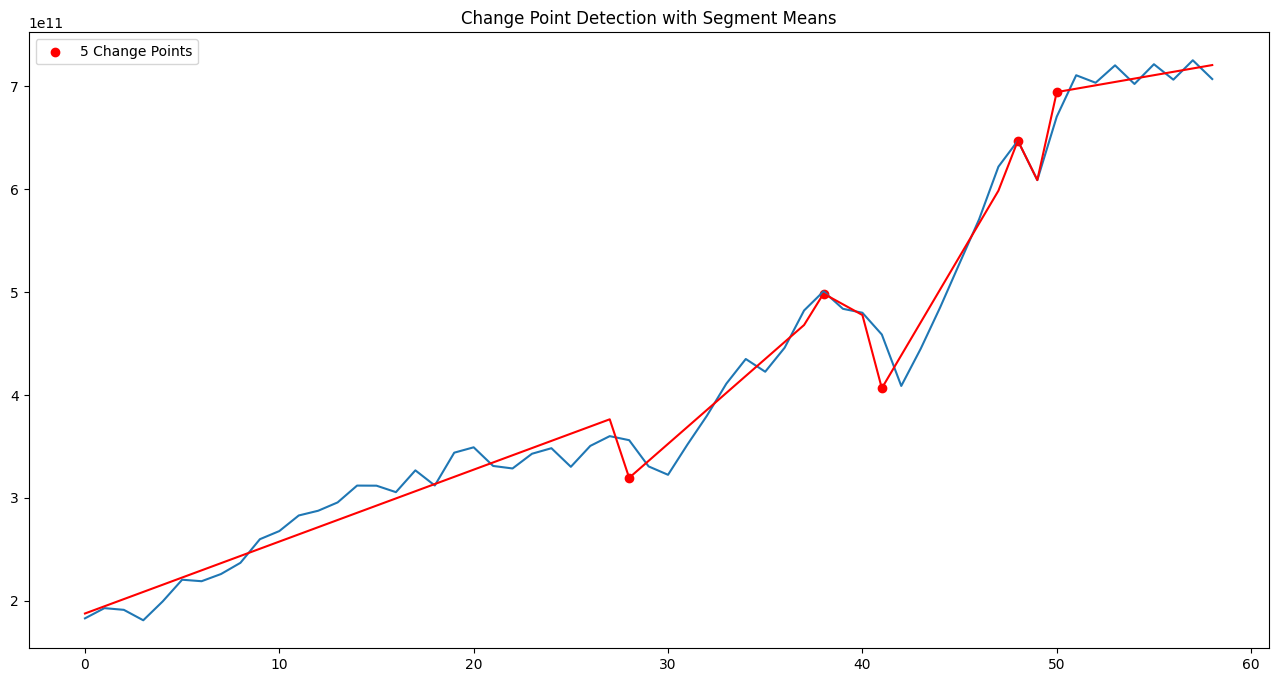

In [6]:
### Non interesting treatment for the data set
df = pd.read_csv("../data/gdp.csv", skiprows=4)

sdf = df[df["Country Name"] == "Argentina"]

columns_years = [col for col in sdf.columns if col.isdigit()]
ts = sdf.loc[:, columns_years]

serie = ts.reset_index(drop=True).T
###
y = serie[0].to_numpy()

detector = PELT(y, cost_mse, 20)
detector.run()
detector.show_changepoints(5, how="linear")

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:01<00:00, 30.12it/s]


Beta for min mBIC: 15.0
mBIC: 3083.9097697887573


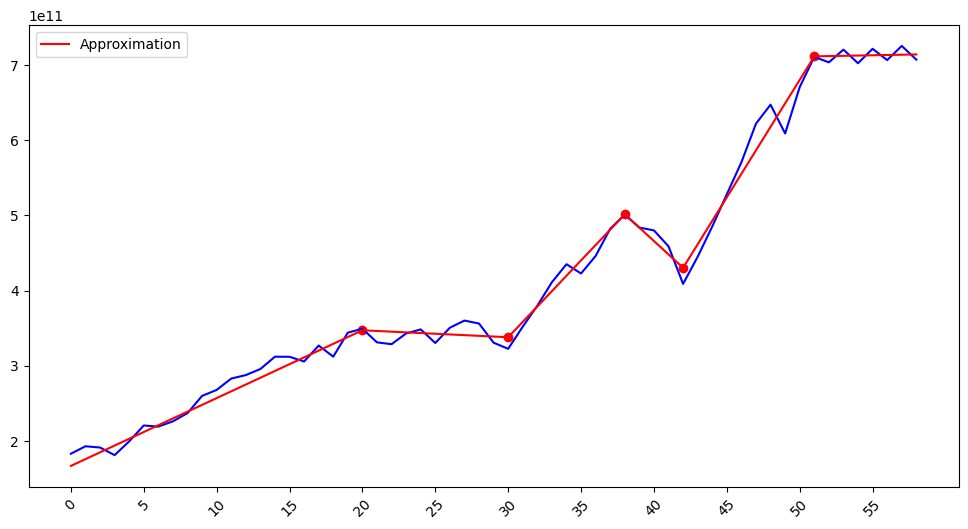

In [5]:
y = serie[0].to_numpy()

detector = CPOP(y)
detector.compute_max_criterion(
    beta_range=np.linspace(15, 20, 39),
    criterion="mBIC",
    upd_sigma=True,
    reset_sigma=True,
    verbose=False,
)
detector._reset_coefs()
detector.update_sigma()
detector.run()
detector.compute_approx_and_plot()

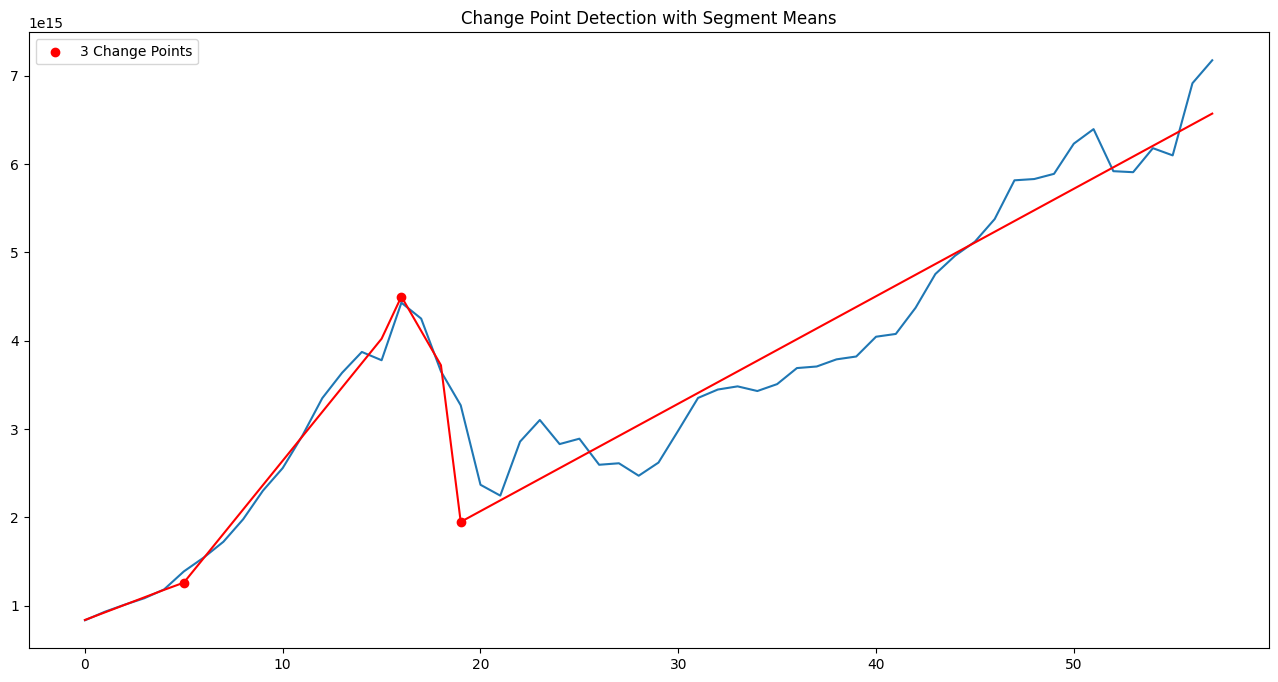

In [8]:
### Loading the data...
import json

with open("../data/gdp_iran.json", "r") as file:
    data = json.load(file)

gdp_iran = np.array(data["series"][0]["raw"])
idxs = np.array(data["time"]["raw"])
###
detector = PELT(gdp_iran, cost_mse, 20)
detector.run()
detector.show_changepoints(3, how="linear")

100%|██████████| 39/39 [00:01<00:00, 29.92it/s]


Beta for min mBIC: 17.894736842105264
mBIC: 4178.827030291612


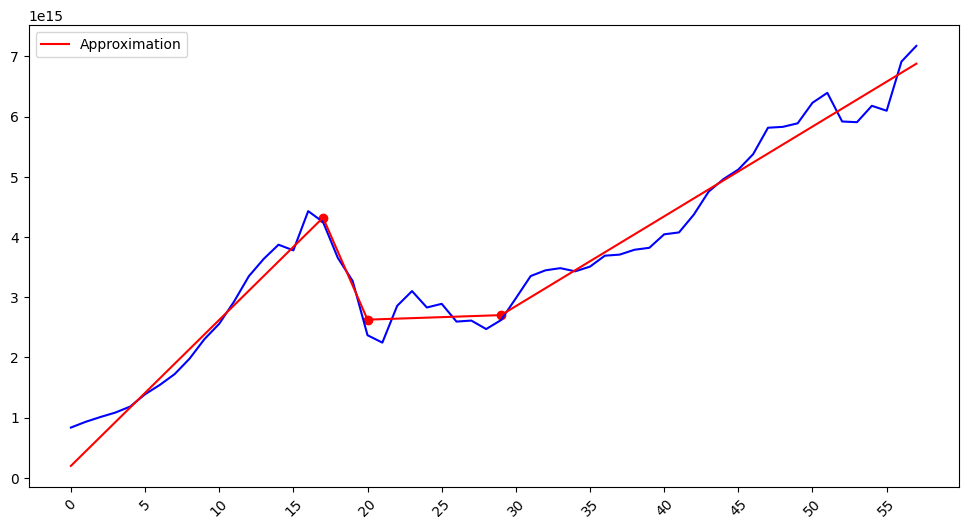

In [ ]:
y = serie[0].to_numpy()

detector = CPOP(gdp_iran)
detector.compute_max_criterion(
    beta_range=np.linspace(0.5, 20, 39),
    criterion="mBIC",
    upd_sigma=True,
    reset_sigma=True,
    verbose=False,
)
detector._reset_coefs()
detector.update_sigma()
detector.run()
detector.compute_approx_and_plot()

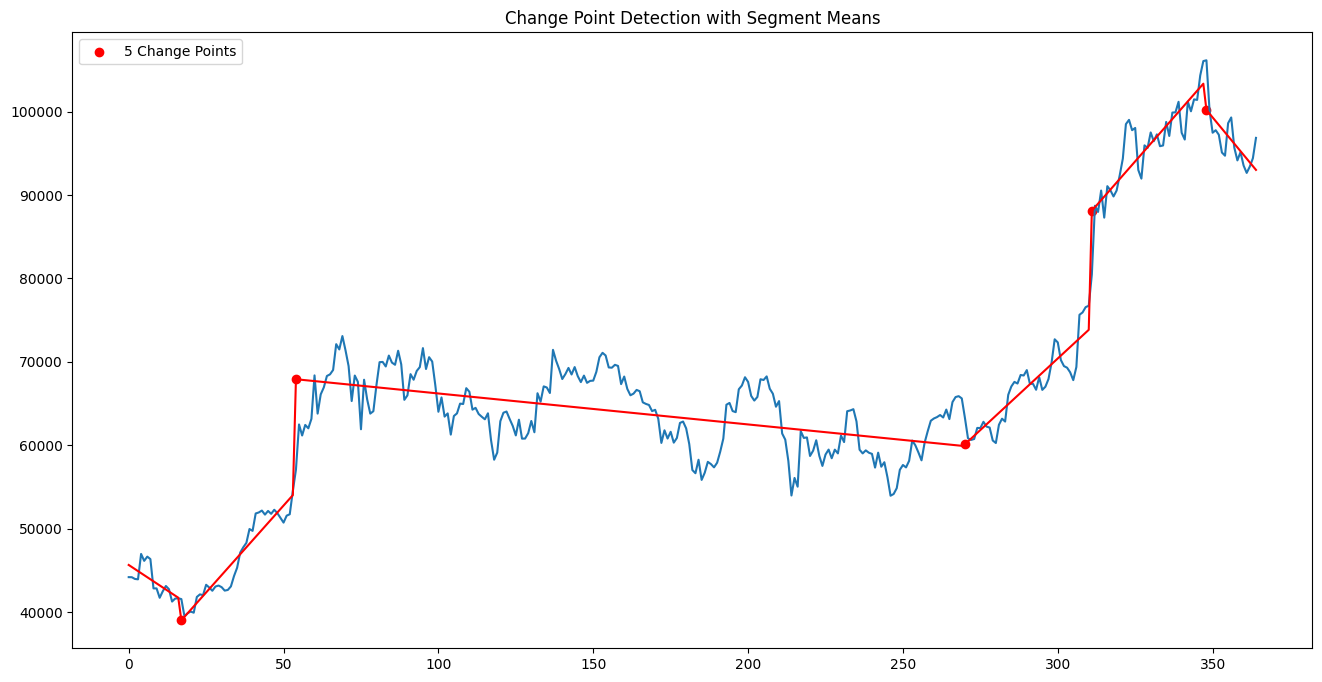

In [186]:
### Data loading ...
with open("../data/market-price.json", "r") as file:
    data = json.load(file)

market_price_data = data["market-price"]

df = pd.DataFrame(market_price_data)

df.rename(columns={"x": "timestamp", "y": "value"}, inplace=True)

df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

###

y = df["value"].to_numpy()


detector = PELT(y, cost_mse, 20)
detector.run()
detector.show_changepoints(5, how="linear")

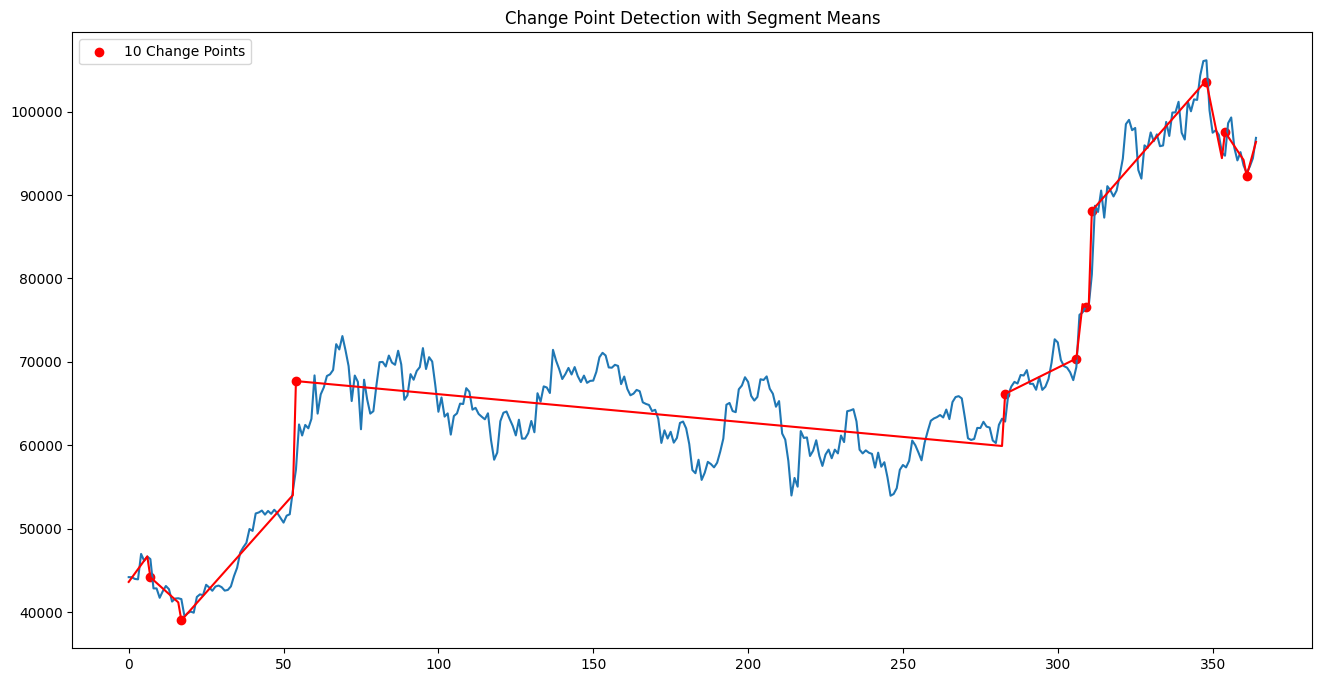

In [190]:
detector.show_changepoints(10, how="linear")

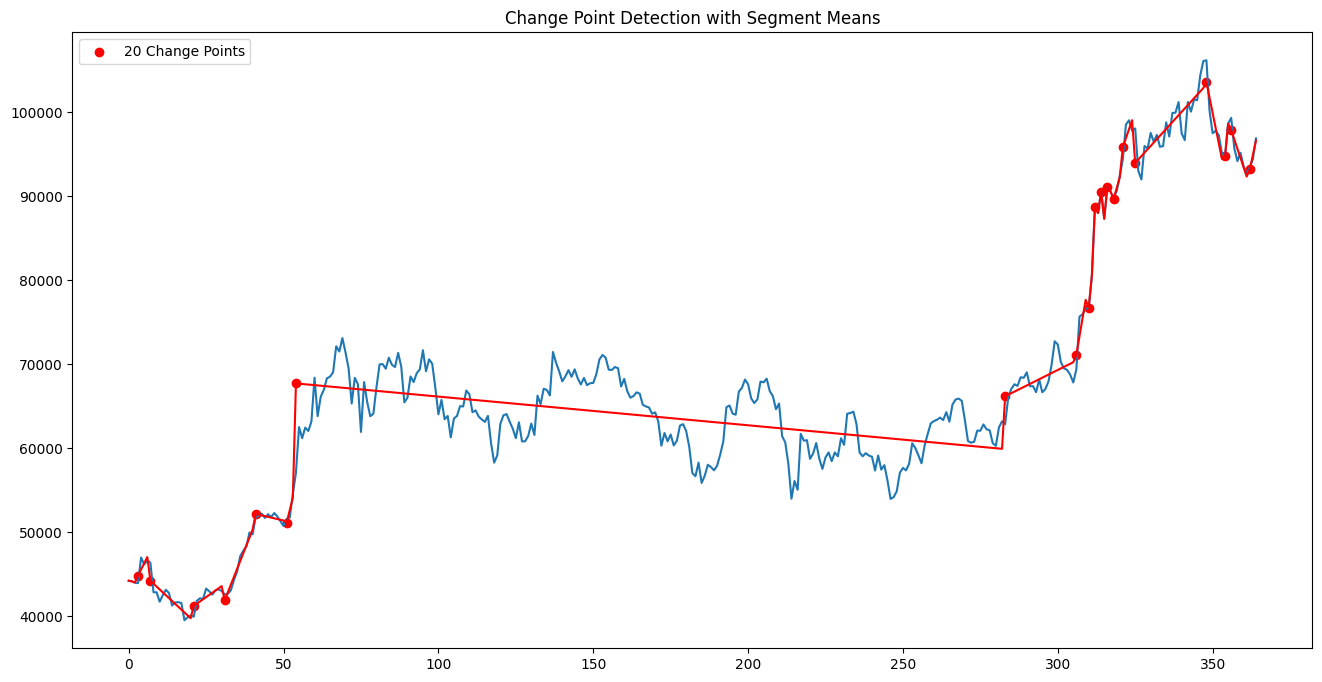

In [191]:
detector.show_changepoints(20, how="linear")